Use the dataset “wholesale_customers_data.csv”. It contains for each customer the amount spent in different product categories.  
Keep the data for the categories “Grocery” and “Milk”.  
Determine the optimal number of clusters

In [2]:
import pandas as pd

pd.set_option("display.width", 1000)

import numpy as np

#Read the csv file
url = 'https://raw.githubusercontent.com/jdecorte/ai_ml/main/datasets/wholesale_customers_data.csv'
dataset=pd.read_csv(url,sep=',')
print(dataset.head(15))



    Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0         2       3  12669   9656     7561     214              2674          1338
1         2       3   7057   9810     9568    1762              3293          1776
2         2       3   6353   8808     7684    2405              3516          7844
3         1       3  13265   1196     4221    6404               507          1788
4         2       3  22615   5410     7198    3915              1777          5185
5         2       3   9413   8259     5126     666              1795          1451
6         2       3  12126   3199     6975     480              3140           545
7         2       3   7579   4956     9426    1669              3321          2566
8         1       3   5963   3648     6192     425              1716           750
9         2       3   6006  11093    18881    1159              7425          2098
10        2       3   3366   5403    12974    4400              5977          1744
11  

In [3]:
wholesale = pd.DataFrame()
wholesale = (dataset[['Milk','Grocery']]).copy()

#Explore the dataset
print(wholesale.head())  #top 5 columns
len(wholesale) # of rows

#descriptive statistics of the dataset
wholesale.describe().transpose()

   Milk  Grocery
0  9656     7561
1  9810     9568
2  8808     7684
3  1196     4221
4  5410     7198


,count,mean,std,min,25%,50%,75%,max
Milk,440.0,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

milk = wholesale.drop('Milk',axis=1)
print(milk.head())

grocery = wholesale.drop('Grocery',axis=1)
print(grocery.head())

wholesale['Milk_SC'] = scaler.fit_transform(milk)
wholesale['Grocery_SC'] = scaler.fit_transform(grocery)
print(wholesale.head())

   Grocery
0     7561
1     9568
2     7684
3     4221
4     7198
   Milk
0  9656
1  9810
2  8808
3  1196
4  5410
   Milk  Grocery   Milk_SC  Grocery_SC
0  9656     7561 -0.041115    0.523568
1  9810     9568  0.170318    0.544458
2  8808     7684 -0.028157    0.408538
3  1196     4221 -0.392977   -0.624020
4  5410     7198 -0.079356   -0.052396


0    432
1    274
2    192
3    157
4    135
5    114
6     99
7     84
8     74
dtype: int64


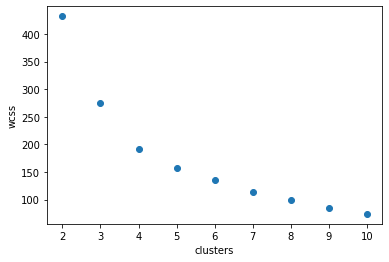

In [6]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    # k-means++ initializes the centroids to be (generally) distant from each other, 
    # leading to probably better results than random initialization
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(wholesale[['Milk_SC','Grocery_SC']])
    # inertia = within cluster some of squares
    wcss.append(np.round(km.inertia_).astype('int64'))

wcss = pd.Series(wcss)

# Plot the dataset
import matplotlib.pyplot as plt
%matplotlib inline

print(wcss)

plt.scatter(range(2,11), wcss)
plt.xlabel('clusters')
plt.ylabel('wcss')

plt.show()

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0        2       3  12669  9656     7561     214              2674          1338
1        2       3   7057  9810     9568    1762              3293          1776
2        2       3   6353  8808     7684    2405              3516          7844
3        1       3  13265  1196     4221    6404               507          1788
4        2       3  22615  5410     7198    3915              1777          5185


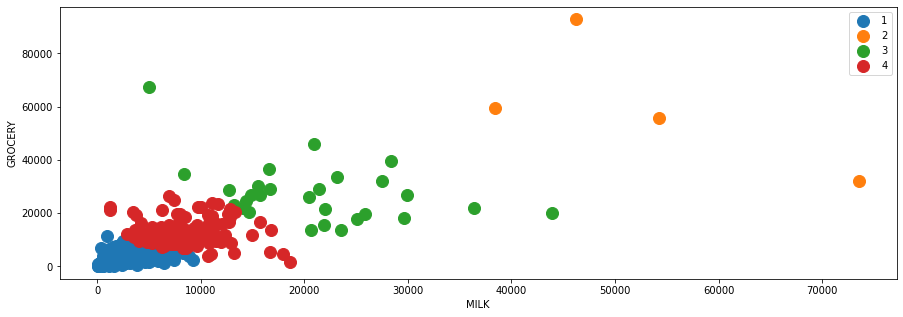

In [7]:
# Based on the elbow plot, we could choose 4,5 or 6 clusters. 
# Let us try 4, 5 and 6 clusters and visualize the clusters to decide on the final number of clusters.
# Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++')
y_means = km4.fit_predict(wholesale[['Milk_SC','Grocery_SC']])
wholesale['Cluster'] = y_means+1
print(dataset.head())

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = wholesale.groupby('Cluster')
print(groups)
fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.Milk, group.Grocery, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('MILK')
plt.ylabel('GROCERY')
    
ax.legend()

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0        2       3  12669  9656     7561     214              2674          1338
1        2       3   7057  9810     9568    1762              3293          1776
2        2       3   6353  8808     7684    2405              3516          7844
3        1       3  13265  1196     4221    6404               507          1788
4        2       3  22615  5410     7198    3915              1777          5185


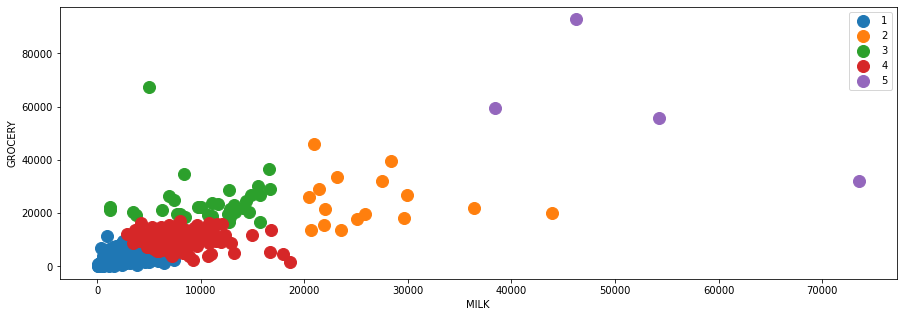

In [8]:
# Based on the elbow plot, we could choose 4,5 or 6 clusters. 
# Let us try 4, 5 and 6 clusters and visualize the clusters to decide on the final number of clusters.
# Fitting kmeans to the dataset with k=4
km5=KMeans(n_clusters=5,init='k-means++')
y_means = km5.fit_predict(wholesale[['Milk_SC','Grocery_SC']])
wholesale['Cluster'] = y_means+1
print(dataset.head())

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = wholesale.groupby('Cluster')

fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.Milk, group.Grocery, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('MILK')
plt.ylabel('GROCERY')
    
ax.legend()

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0        2       3  12669  9656     7561     214              2674          1338
1        2       3   7057  9810     9568    1762              3293          1776
2        2       3   6353  8808     7684    2405              3516          7844
3        1       3  13265  1196     4221    6404               507          1788
4        2       3  22615  5410     7198    3915              1777          5185


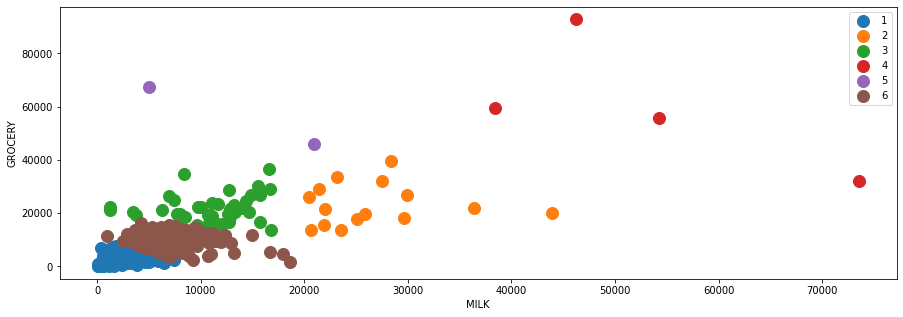

In [9]:
# Based on the elbow plot, we could choose 4,5 or 6 clusters. 
# Let us try 4, 5 and 6 clusters and visualize the clusters to decide on the final number of clusters.
# Fitting kmeans to the dataset with k=4
km6=KMeans(n_clusters=6,init='k-means++')
y_means = km6.fit_predict(wholesale[['Milk_SC','Grocery_SC']])
wholesale['Cluster'] = y_means+1
print(dataset.head())

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = wholesale.groupby('Cluster')

fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.Milk, group.Grocery, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('MILK')
plt.ylabel('GROCERY')
    
ax.legend()